In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_graph_simple(file):
    G = nx.read_graphml(file)
    nx.draw(G, with_labels = True)

First Step

In [3]:
def get_roots(G):
    childrenSet = set()
    for edge in G.edges:
        childrenSet.add(edge[1]) 
    return set(G.nodes) - childrenSet

In [4]:
def reindex_roots(G):
    roots = get_roots(G)
    new_roots = set()
    num = 1
    map_indexes = {}
    for root in roots:
        new_index = root + "|" + str(1)
        map_indexes[root] = new_index
        new_roots.add(new_index)
    G = nx.relabel_nodes(G, map_indexes)
    num += 1
    return G, new_roots

In [5]:
def check_potential(G, processed_vertex, node):
    if node in processed_vertex:
        return False, []
    input_nodes = []
    candidate = True
    for edge in G.edges:
        if edge[1] == node:
            input_nodes.append(edge[0])
            if edge[0] not in processed_vertex:
                candidate = False
                break
    return candidate, input_nodes

In [6]:
def get_sort_value(item):
    return int(item.split("|")[1])

In [7]:
def sort_items(first_, second_):
    first = []
    second = []
    for el in first_:
        first.append(get_sort_value(el))
    for el in second_:
        second.append(get_sort_value(el)) 
    first.sort(reverse=True)
    second.sort(reverse=True)
    return first, second

In [8]:
def is_less(first_, second_):
    first, second = sort_items(first_, second_)
    min_len = min(len(first), len(second))
    for i in range(min_len):
        if first[i] < second[i]:
            return True
        if first[i] > second[i]:
            return False
    return len(first) < len(second)

In [9]:
def get_minimal(candidates, minimal, candidate):
    if minimal == {}:
        return candidate
    if is_less(candidates.get(minimal), candidates.get(candidate)):
        return minimal
    else:
        return candidate

In [10]:
def get_minimal_candidate(candidates):
    if len(candidates) < 0:
        print("Smth goes wrong")
    minimal = {}
    for candidate in candidates:
        minimal = get_minimal(candidates, minimal, candidate)
    return minimal

In [11]:
def get_potential_nodes(G, processed_vertex, candidates, node):
    for edge in G.edges(node):
        candidate, input_nodes = check_potential(G, processed_vertex, edge[1])
        if candidate:
            candidates[edge[1]] = input_nodes

In [12]:
def search_next(G, processed_vertex):
    candidates = {}
    for node in processed_vertex:
        get_potential_nodes(G, processed_vertex, candidates, node)
    return get_minimal_candidate(candidates)

In [13]:
def reindex_children(G, roots):
    num = len(roots)
    processed_vertex = roots
    will_processed_vertex = roots
    while len(processed_vertex) != len(G.nodes):
        node = search_next(G, processed_vertex)
        num += 1
        next_node = node + "|" + str(num)
        map_index = {node: next_node}
        G = nx.relabel_nodes(G, map_index)
        processed_vertex.add(next_node)
    return G

In [14]:
def recalc_pos_GK(G):
    G, roots = reindex_roots(G)
    G = reindex_children(G, roots)
    return G

Second Step

In [15]:
def get_num_by_node(item):
    return int(item.split("|")[1])

In [16]:
def get_node_by_num(G, num):
    for node in G.nodes:
        if get_num_by_node(node) == num:
            return node

In [17]:
def is_candidate(G, processed, node):
    if node in processed:
        return False
    if len(G.edges(node)) == 0:
        return True
    for edge in G.edges(node):
        if edge[1] not in processed:
            return False
    return True

In [18]:
def is_child_current_layer(G, current, node):
    for edge in G.edges(node):
        if edge[1] in current:
            return True
    return False

In [19]:
def search_max_node(G, processed):
    max_i = 0
    max_node = ""
    for node in G.nodes:
        if is_candidate(G, processed, node):
            node_i = get_num_by_node(node)
            if node_i > max_i:
                max_i = node_i
                max_node = node
    return max_node

In [20]:
def get_coordinates(G, width):
    coordinates = {}
    processed = set()
    state = 1
    current = set()
    while len(processed) != len(G.nodes):
        if len(current) == width:
            state += 1
            current = set()
            continue
        node = search_max_node(G, processed)
        if is_child_current_layer(G, current, node):
            current = set()
            state += 1
        current.add(node)
        processed.add(node)
        coordinates[node] = {'coordinate': (len(current), state)}
    return coordinates

In [21]:
def set_layer(G, width):
    coordinates = get_coordinates(G, width)
    nx.set_node_attributes(G, coordinates)
    return G

Минимизация колличества пересечениц ребер через добавление dummy-вершин

Draw graph

In [22]:
def settings_graph():
    figure, axis = plt.subplots(figsize=(20, 20))
    axis.grid(True)
    node_size = 480
    return node_size, axis

In [23]:
def draw_graph_GK(width, file):
    G = nx.read_graphml(file)
    G = recalc_pos_GK(G)
    G = set_layer(G, width)
    node_size, axis = settings_graph()
    nx.draw(G, nx.get_node_attributes(G, 'coordinate'), node_size=node_size, with_labels=True, ax=axis)

Без применения алгоритма

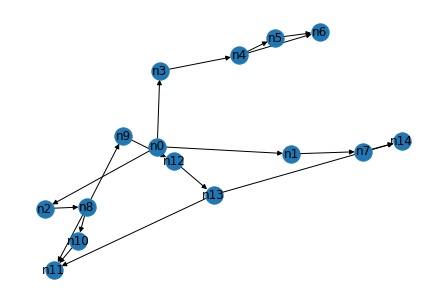

In [24]:
draw_graph_simple("test/small_dag.graphml")

После алгоритма Грэхема—Коффмана

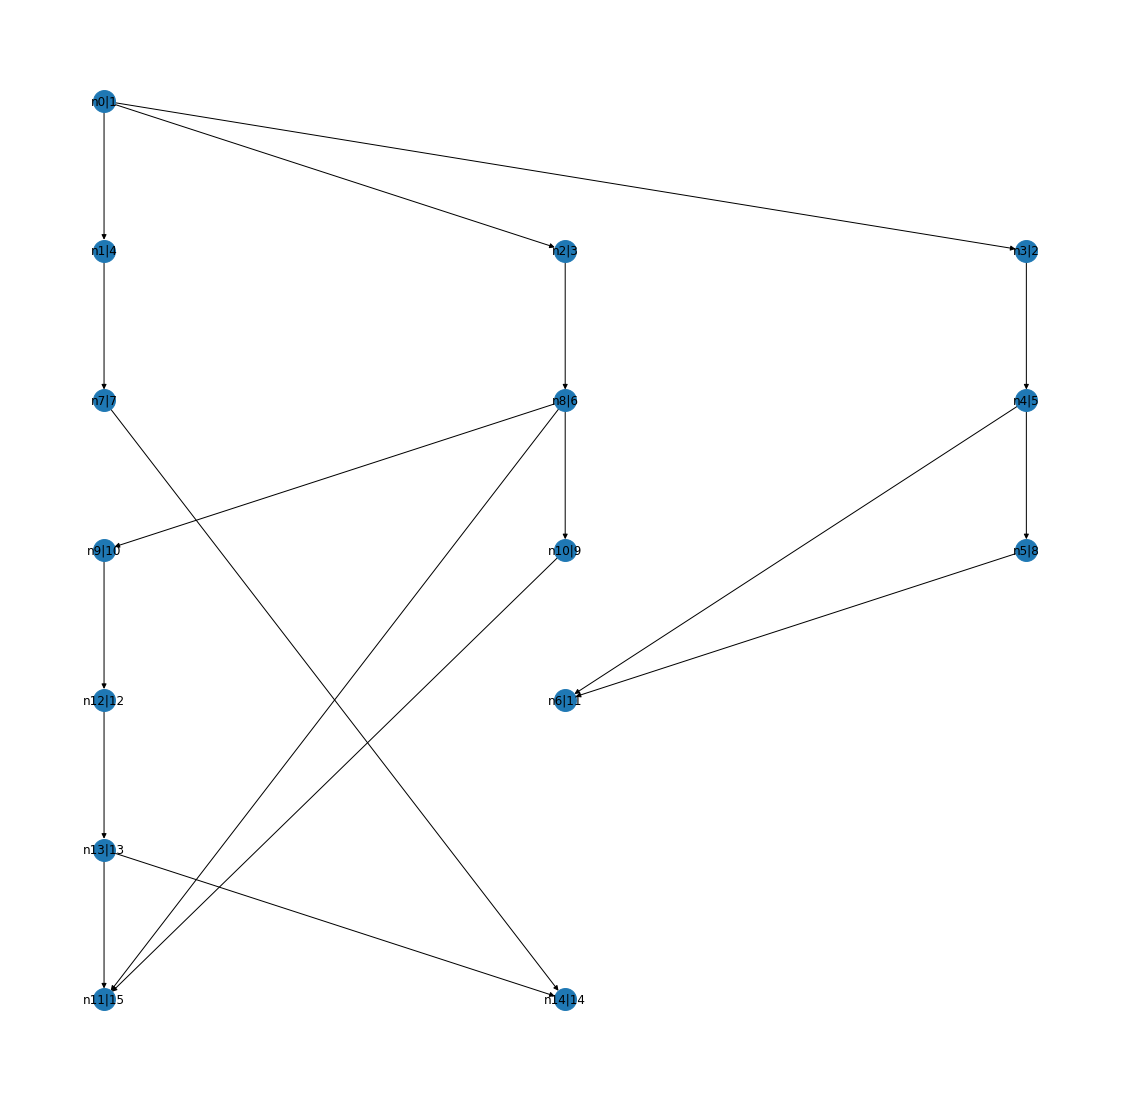

In [25]:
draw_graph_GK(3, "test/small_dag.graphml")

Без применения алгоритма

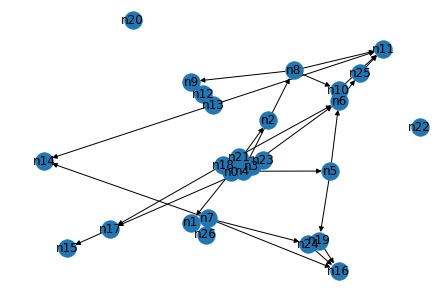

In [26]:
draw_graph_simple("test/big_dag.graphml")

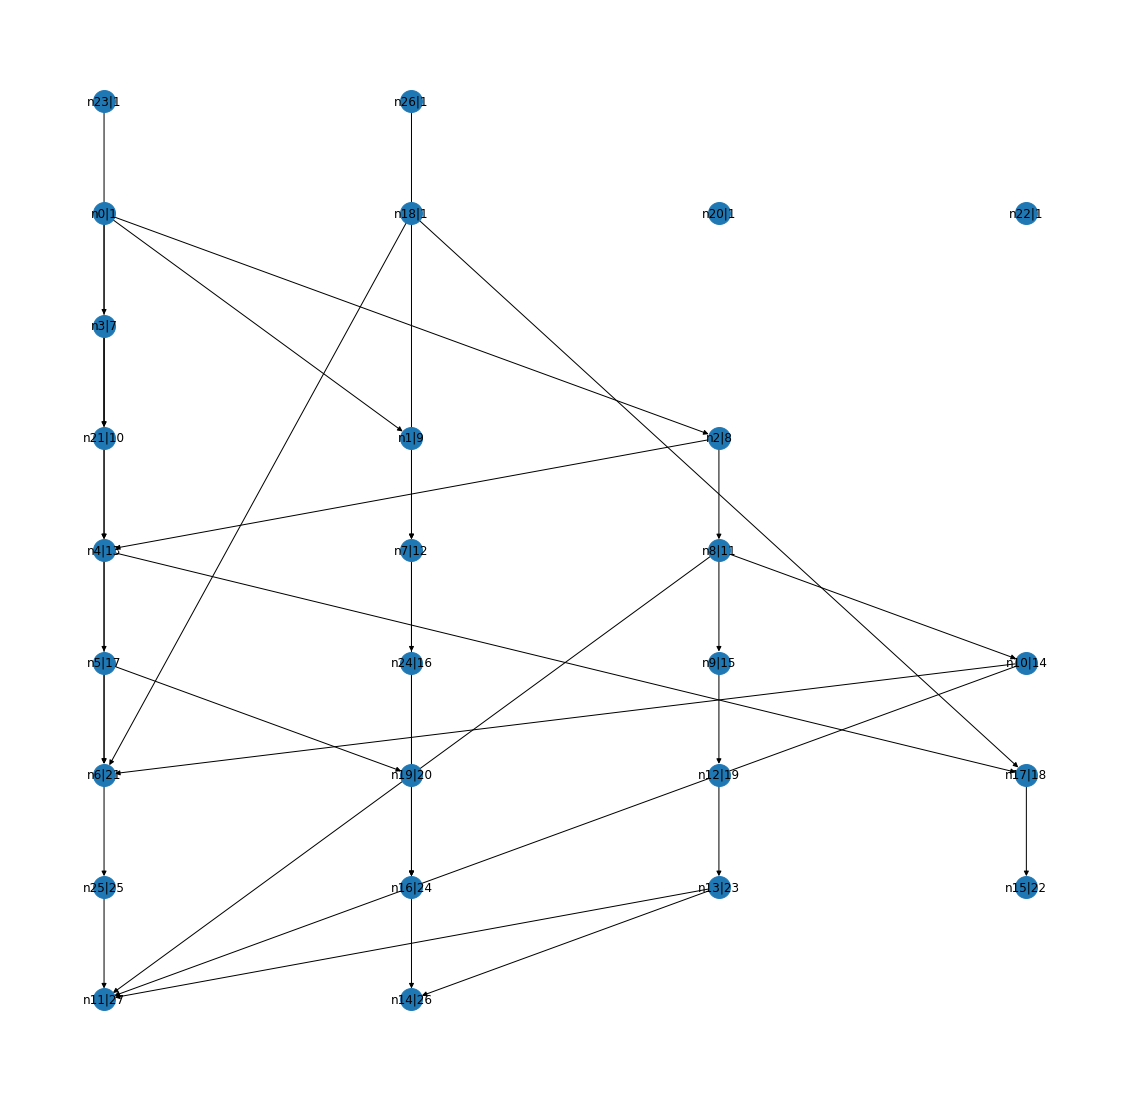

In [27]:
draw_graph_GK(4, "test/big_dag.graphml")

Реализация с dummy вершинами

In [ ]:
def add_dummy(G):
    G.

In [ ]:
def draw_graph_GK_with_dummy():
    G = nx.read_graphml(file)
    G = recalc_pos_GK(G)
    G = set_layer(G, width)
    node_size, axis = settings_graph()
    nx.draw(G, nx.get_node_attributes(G, 'coordinate'), node_size=node_size, with_labels=True, ax=axis)